In [1]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('abc_examiner', index_col=0)

/home/amanda/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.head()

,publish_date,headline_text,clickbait,length,contains_exclaim,contains_question,no_stop,num_stopwords,percent_stop,num_words
0,2010-01-01,"['12m', 'degas', 'stolen', 'from', 'museum']",0,28,0,0,"['12m', 'degas', 'stolen', 'museum']",1,0.200000,4
1,2010-01-01,"['17', 'die', 'in', 'bangladesh', 'bus', 'crash']",0,30,0,0,"['17', 'die', 'bangladesh', 'bus', 'crash']",1,0.166667,5
2,2010-01-01,"['2010', 'to', 'be', 'drier', 'after', 'very',...",0,36,0,0,"['2010', 'drier', 'wet', '2009']",4,0.500000,4
3,2010-01-01,"['37', 'catholic', 'workers', 'killed', 'world...",0,36,0,0,"['37', 'catholic', 'workers', 'killed', 'world...",0,0.000000,5
4,2010-01-01,"['600', 'hurt', 'in', 'philippine', 'new', 'ye...",0,39,0,0,"['600', 'hurt', 'philippine', 'new', 'year', '...",1,0.142857,6


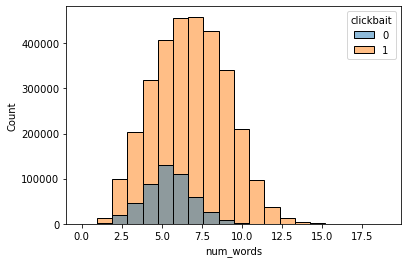

In [4]:
sns.histplot(df, x='num_words', hue='clickbait', bins=20)

In [5]:
df['publish_date'] = pd.to_datetime(df['publish_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3582247 entries, 0 to 3582246
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_text      object        
 2   clickbait          int64         
 3   length             int64         
 4   contains_exclaim   int64         
 5   contains_question  int64         
 6   no_stop            object        
 7   num_stopwords      int64         
 8   percent_stop       float64       
 9   num_words          int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 300.6+ MB


In [6]:
df.describe()

,clickbait,length,contains_exclaim,contains_question,num_stopwords,percent_stop,num_words
count,3.582247e+06,3.582247e+06,3.582247e+06,3.582247e+06,3.582247e+06,3.582005e+06,3.582247e+06
mean,8.625260e-01,5.165683e+01,2.058931e-02,4.895196e-02,1.929295e+00,2.157510e-01,6.423850e+00
std,3.443472e-01,1.820707e+01,1.420049e-01,2.157676e-01,1.530970e+00,1.483143e-01,2.351434e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,3.800000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.250000e-01,5.000000e+00
50%,1.000000e+00,5.100000e+01,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e-01,6.000000e+00
75%,1.000000e+00,6.600000e+01,0.000000e+00,0.000000e+00,3.000000e+00,3.076923e-01,8.000000e+00
max,1.000000e+00,1.030000e+02,1.000000e+00,1.000000e+00,2.100000e+01,1.000000e+00,1.900000e+01


In [7]:
df.isna().any()

publish_date         False
headline_text        False
clickbait            False
length               False
contains_exclaim     False
contains_question    False
no_stop              False
num_stopwords        False
percent_stop          True
num_words            False
dtype: bool

In [8]:
df.fillna(0, inplace=True) #looks like percent_stop has some nan because some headlines have 0 stop words fill with 0

In [9]:
df['total_words'] = df['num_words']+df['num_stopwords']

In [10]:
#some headlines are only one word or just letters, dropping these
df[df['num_words']<=1].head()
df.loc[(df['length']<10) & (df['total_words']>2)].head() 


,publish_date,headline_text,clickbait,length,contains_exclaim,contains_question,no_stop,num_stopwords,percent_stop,num_words,total_words
233690,2012-11-27,"['fire', 'o', 's']",0,8,0,0,['fire'],2,0.666667,1,3
295720,2013-07-26,"['x', 'x', 'x']",0,5,0,0,"['x', 'x', 'x']",0,0.000000,3,3
322454,2013-11-08,"['sa', 'gm', 'ban']",0,9,0,0,"['sa', 'gm', 'ban']",0,0.000000,3,3
322531,2013-11-08,"['x', 'x', 'x']",0,5,0,0,"['x', 'x', 'x']",0,0.000000,3,3
325108,2013-11-19,"['x', 'x', 'x']",0,5,0,0,"['x', 'x', 'x']",0,0.000000,3,3


In [11]:
#dropiing anything less than 10 characters in length or less than 2 words
df = df.drop(df.loc[(df['length']<10) & (df['total_words']>2)].index)

In [12]:
df.loc[(df['length']<10) & (df['total_words']>2)].count()


publish_date         0
headline_text        0
clickbait            0
length               0
contains_exclaim     0
contains_question    0
no_stop              0
num_stopwords        0
percent_stop         0
num_words            0
total_words          0
dtype: int64

In [13]:

df.shape

(3582150, 11)

Randomly selecting clickbait headlines to even out the data sets

In [14]:

#creating year and month columns to group by
df['year'] = df['publish_date'].dt.year
df['month'] = df['publish_date'].dt.month
df.head()

,publish_date,headline_text,clickbait,length,contains_exclaim,contains_question,no_stop,num_stopwords,percent_stop,num_words,total_words,year,month
0,2010-01-01,"['12m', 'degas', 'stolen', 'from', 'museum']",0,28,0,0,"['12m', 'degas', 'stolen', 'museum']",1,0.200000,4,5,2010,1
1,2010-01-01,"['17', 'die', 'in', 'bangladesh', 'bus', 'crash']",0,30,0,0,"['17', 'die', 'bangladesh', 'bus', 'crash']",1,0.166667,5,6,2010,1
2,2010-01-01,"['2010', 'to', 'be', 'drier', 'after', 'very',...",0,36,0,0,"['2010', 'drier', 'wet', '2009']",4,0.500000,4,8,2010,1
3,2010-01-01,"['37', 'catholic', 'workers', 'killed', 'world...",0,36,0,0,"['37', 'catholic', 'workers', 'killed', 'world...",0,0.000000,5,5,2010,1
4,2010-01-01,"['600', 'hurt', 'in', 'philippine', 'new', 'ye...",0,39,0,0,"['600', 'hurt', 'philippine', 'new', 'year', '...",1,0.142857,6,7,2010,1


In [15]:
df[df['clickbait']==0].count()

publish_date         492452
headline_text        492452
clickbait            492452
length               492452
contains_exclaim     492452
contains_question    492452
no_stop              492452
num_stopwords        492452
percent_stop         492452
num_words            492452
total_words          492452
year                 492452
month                492452
dtype: int64

In [16]:
df[df['clickbait']==1].count()

publish_date         3089698
headline_text        3089698
clickbait            3089698
length               3089698
contains_exclaim     3089698
contains_question    3089698
no_stop              3089698
num_stopwords        3089698
percent_stop         3089698
num_words            3089698
total_words          3089698
year                 3089698
month                3089698
dtype: int64

In [17]:
492452/3089698

0.1593851567370015

So we only want to keep 16% of the clickbait headlines.

I will just randomly select these from the df

In [18]:
c = df[df['clickbait']==1] #selecting clickbait headlines
c = c.sample(frac=0.16, random_state=1) #randomly selecting
c.count() 

publish_date         494352
headline_text        494352
clickbait            494352
length               494352
contains_exclaim     494352
contains_question    494352
no_stop              494352
num_stopwords        494352
percent_stop         494352
num_words            494352
total_words          494352
year                 494352
month                494352
dtype: int64

In [19]:
#merging new clickbait selections with non clickbait 
nc = df[df['clickbait']==0].reset_index()
df = pd.concat([c, nc], ignore_index=True)

In [20]:
df.describe()

,clickbait,length,contains_exclaim,contains_question,num_stopwords,percent_stop,num_words,total_words,year,month,index
count,986804.000000,986804.000000,986804.000000,986804.000000,986804.000000,986804.000000,986804.000000,986804.000000,986804.000000,986804.000000,492452.000000
mean,0.500963,46.524570,0.012017,0.028296,1.571945,0.188505,5.911758,7.483703,2012.097222,6.378132,246229.867398
std,0.499999,17.090187,0.108960,0.165818,1.407191,0.144587,2.143372,2.854618,1.651663,3.411557,142163.828879
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,1.000000,0.000000
25%,0.000000,34.000000,0.000000,0.000000,1.000000,0.090909,4.000000,6.000000,2011.000000,3.000000,123112.750000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,0.166667,6.000000,7.000000,2012.000000,6.000000,246226.500000
75%,1.000000,58.000000,0.000000,0.000000,2.000000,0.285714,7.000000,9.000000,2013.000000,9.000000,369350.250000
max,1.000000,103.000000,1.000000,1.000000,21.000000,1.000000,18.000000,23.000000,2015.000000,12.000000,492465.000000


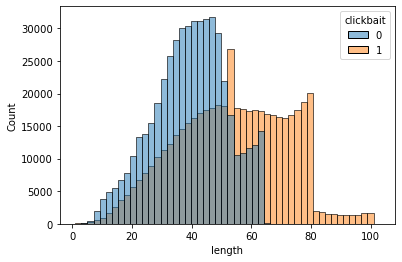

In [21]:
sns.histplot(df,bins=50, x='length', hue='clickbait')


In [22]:
df['headline_text']

0         ['tough', 'day', 'for', 'punt', 'returners', '...
1         ['worldclass', 'street', 'fighters', 'to', 'ba...
2         ['dirty', 'martini', 'in', 'v', 'magazines', '...
3         ['majority', 'wants', 'change', 'in', 'educati...
4         ['easy', 'oven', 'roasted', 'parmesan', 'potat...
                                ...                        
986799    ['wild', 'dog', '1080', 'baiting', 'regulation...
986800    ['wild', 'dogs', 'bait', 'program', 'willem', ...
986801    ['win', 'tv', 'could', 'go', 'black', 'if', 'n...
986802    ['woolly', 'sheep', 'found', 'stuck', 'in', 'c...
986803        ['your', 'favourite', 'movies', 'of', '2015']
Name: headline_text, Length: 986804, dtype: object

### RNN

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#tokenizing headlines
x_data = df['headline_text']

tokenizer = Tokenizer(num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split=' ', oov_token=True)
    
                      
tokenizer.fit_on_texts(x_data)
df['token'] = tokenizer.texts_to_sequences(x_data)
df['token'] = pad_sequences(df['token'])


In [ ]:
df.shape

In [ ]:
#spliting data 75/25 train/test
from sklearn.model_selection import train_test_split

x = df['token']
y = df['clickbait']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=1)

In [ ]:
df.head()

In [ ]:

'''x_train = np.asarray([i for singleList in x_train for i in singleList])
x_test  = np.asarray([i for singleList in x_test for i in singleList])
y_train = np.asarray(y_train)
y_test = np.asarray([i for singleList in y_test for i in singleList])
'''

x_train = np.reshape(x_train, [-1, 1])
x_test = np.reshape(x_test, [-1,1])
y_train = np.reshape(y_train, [-1,1])
y_test = np.reshape(y_test, [-1,1])

'''x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test,-1)
y_train = np.expand_dims(y_train, -1)
y_test = np.expand_dims(y_test,-1)
'''

model = Sequential()

model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

# Compile model
model.compile(
    loss='mse',
    optimizer=opt,
    metrics=['accuracy'],
)

model.fit(x_train,
          y_train,
          epochs=3,
          validation_data=(x_test, y_test))